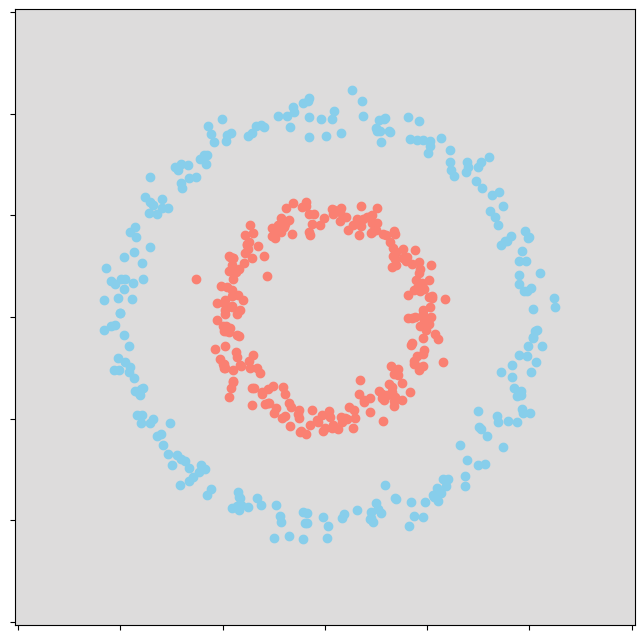

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

In [7]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.compat.v1.placeholder('float', shape=[None, X.shape[1]])
iY = tf.compat.v1.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

RuntimeError: tf.placeholder() is not compatible with eager execution.

## Keras

In [8]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

C:\Users\Dan\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 4s 6ms/step - loss: 0.2311 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2284 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2259 - acc: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2236 - acc: 0.5240
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2213 - acc: 0.5480
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2189 - acc: 0.5880
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2165 - acc: 0.6560
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2140 - acc: 0.7300
Epoch 9/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2113 - acc: 0.7840
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2087 - acc: 0.8280
Epoch 11/100
16/16 [==============================] - 0s 8m

## Sklearn

In [9]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.13283584
Iteration 2, loss = 0.12775819
Iteration 3, loss = 0.12543822
Iteration 4, loss = 0.12494609
Iteration 5, loss = 0.12510184
Iteration 6, loss = 0.12514106
Iteration 7, loss = 0.12507630
Iteration 8, loss = 0.12503221
Iteration 9, loss = 0.12514739
Iteration 10, loss = 0.12504136
Iteration 11, loss = 0.12506086
Iteration 12, loss = 0.12505686
Iteration 13, loss = 0.12503408
Iteration 14, loss = 0.12505105
Iteration 15, loss = 0.12507418
Iteration 16, loss = 0.12505269
Iteration 17, loss = 0.12502998
Iteration 18, loss = 0.12503206
Iteration 19, loss = 0.12502067
Iteration 20, loss = 0.12504473
Iteration 21, loss = 0.12505006
Iteration 22, loss = 0.12511557
Iteration 23, loss = 0.12508091
Iteration 24, loss = 0.12506507
Iteration 25, loss = 0.12506773
Iteration 26, loss = 0.12518449
Iteration 27, loss = 0.12511781
Iteration 28, loss = 0.12505928
Iteration 29, loss = 0.12501809
Iteration 30, loss = 0.12515635
Iteration 31, loss = 0.12513929
Iteration 32, los

C:\Users\Dan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)

In [10]:
import matplotlib.pyplot as plt

import tensorflow as tf
layers = tf.keras.layers

import numpy as np

print(tf.__version__)

2.10.0


In [11]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

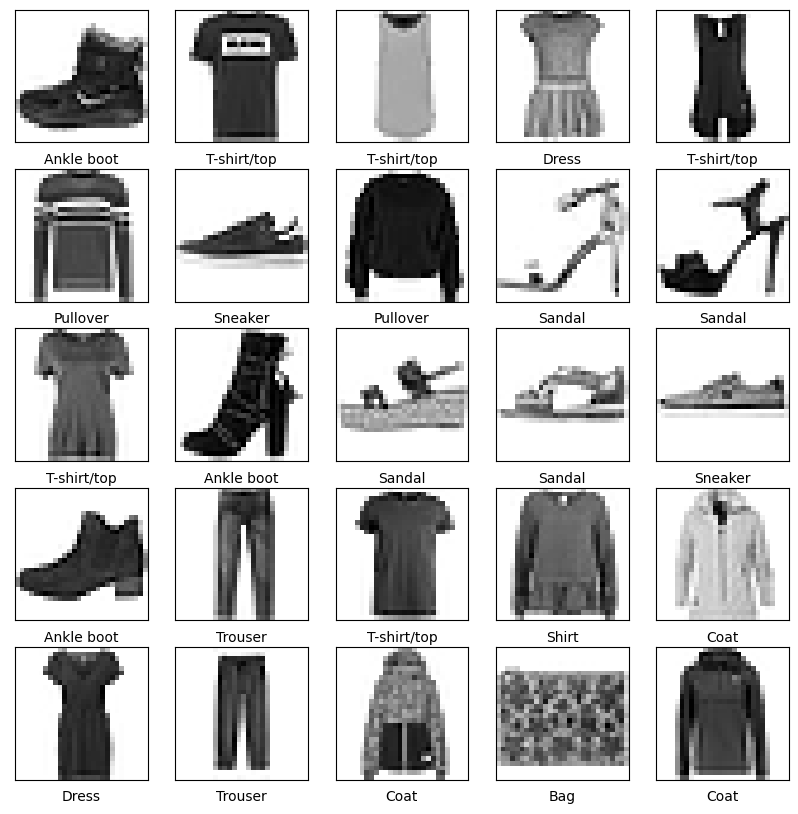

In [15]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()



In [16]:
model = tf.keras.Sequential()

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Such a model can then be compiled and trained in a few lines:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5137 - accuracy: 0.8178
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3814 - accuracy: 0.8614
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3459 - accuracy: 0.8724
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3235 - accuracy: 0.8805
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3051 - accuracy: 0.8860


In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 6ms/step - loss: 0.3632 - accuracy: 0.8706


[0.3632413446903229, 0.8705999851226807]

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 4s 7ms/step


In [20]:


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



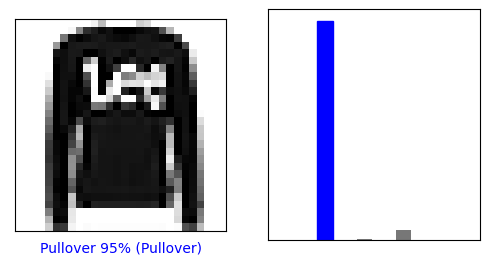

In [25]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [26]:
predicted_label = class_names[np.argmax(predictions[0])]
print('Actual label:', class_names[y_test[0]])
print('Predicted label:', predicted_label)



Actual label: Ankle boot
Predicted label: Ankle boot
